# Machine Learning Engineer Nanodegree
# Bank Marketing
by Arthur Vetori

## Exploratory Data Analysis

We start this project doing EDA to understand better how the features are distributed or correlated.

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import numpy as np

## Loading the dataset into memory
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [284]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [285]:
df.describe(include=[np.object])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Univariate Analysis

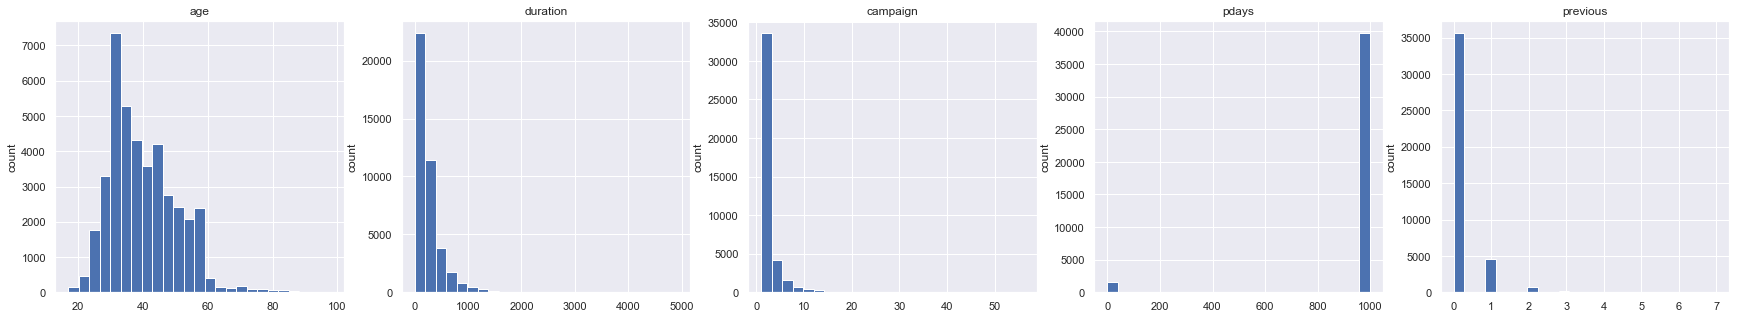

In [286]:
## Taking a look on the distribution of some quantitative variables
columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
n_bins = 25

fig, axes = plt.subplots(1, len(columns), figsize=(30, 5))

for idx, col in enumerate(columns):
    axes[idx].hist(df[col], bins = n_bins)
    axes[idx].set_title(col)
    axes[idx].set(ylabel='count')

As we can see in the plot and dataset description above, almost all of the values for pdays falls in **999** (client was not previously contacted). For the previous feature, most of the value falls in **0** (client never contacted before the campaign). Duration and campaign shows a right-skewed distribution. Age also has positive skewness, but much less than duration and campaign.

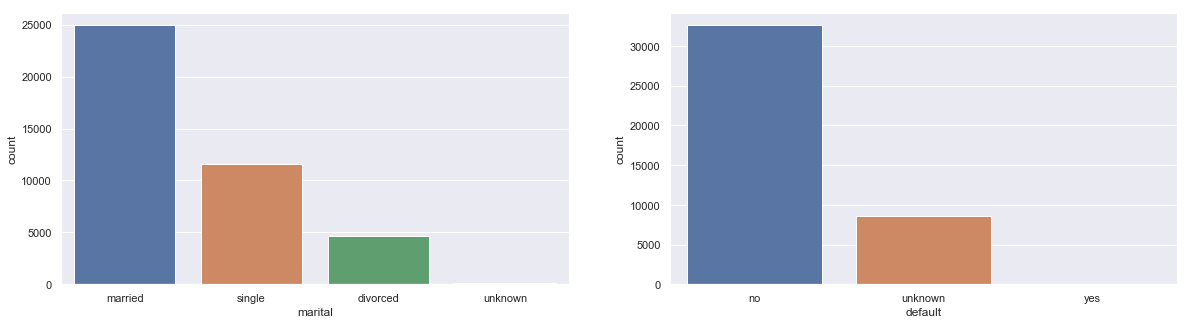

In [287]:
## Checking for categorical variables
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x="marital", data=df, ax = axes[0])
sns.countplot(x="default", data=df, ax = axes[1])

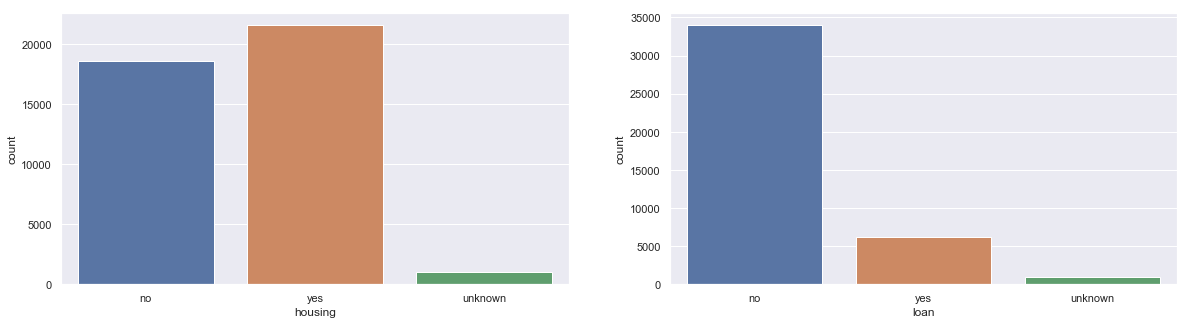

In [288]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x="housing", data=df, ax = axes[0])
sns.countplot(x="loan", data=df, ax = axes[1])

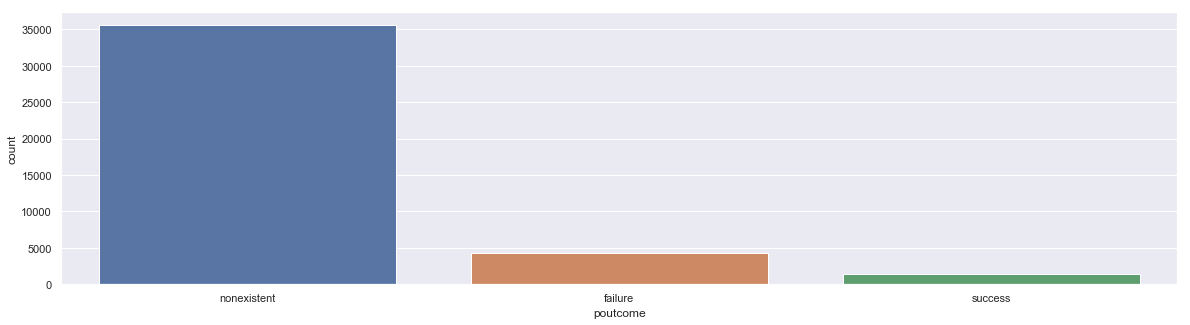

In [289]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x="poutcome", data=df)

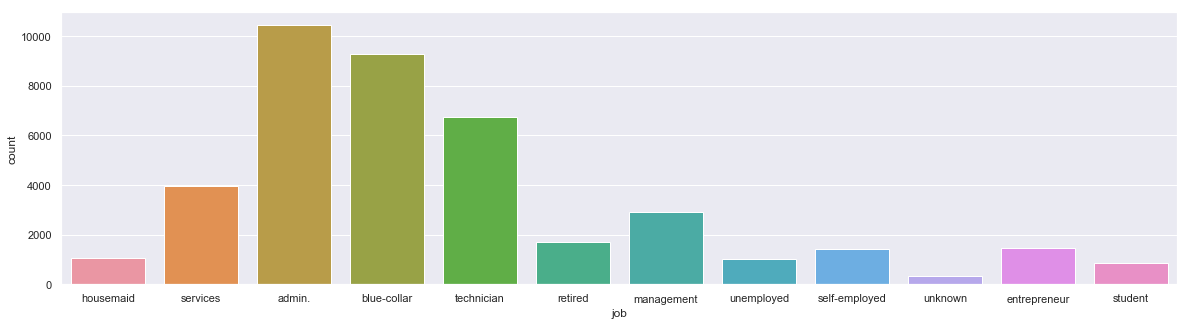

In [290]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x="job", data=df)

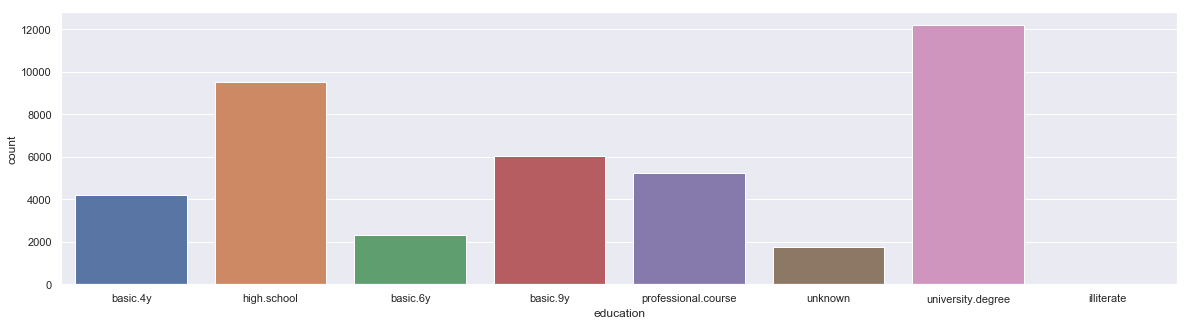

In [291]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x="education", data=df)

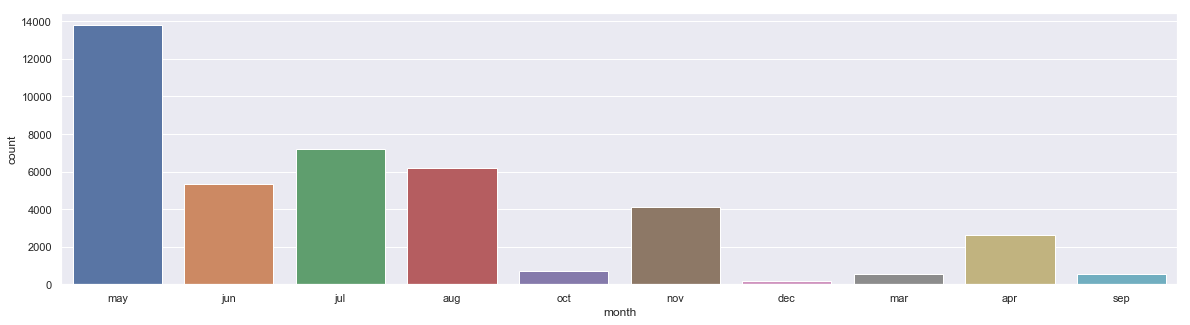

In [292]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x="month", data=df)

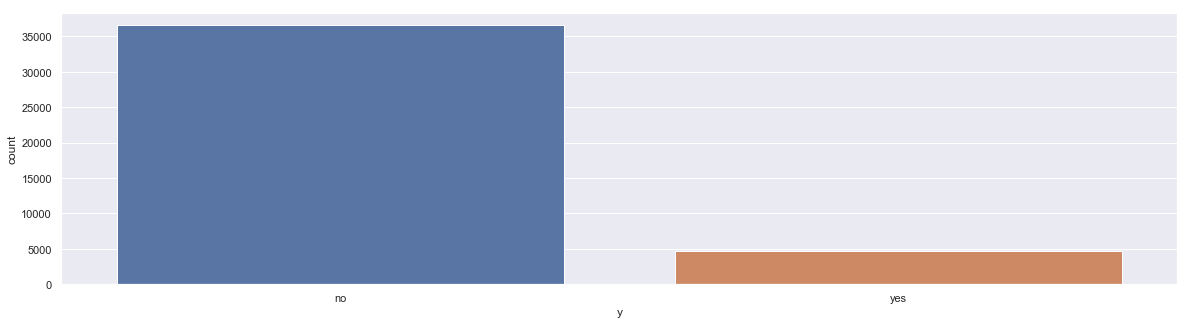

In [293]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x="y", data=df)

* More than half of the clients in the dataset are married
* More than 75% of the clients did not previously defaulted in credit
* Almost half of the clients in the dataset does not have housing loan. This could be a good indicator for the purshasement of time deposit, since it may indicate that the client maybe have money savings
* Aproximately 85% of the clients doesn't have loans. Probably the calls are made to clients who do not have loans.
* Aproximately 60% of the jobs in the dataset are composed from administrators, blue-collars and technicians
* Aproximately 30% of the clients have university degree
* Most of the calls were made in may
* Aproximately 12% of the clients subscribed for the time deposit

## Multivariate Analysis


In [294]:
## Removing unknown variables before analyze them
df_bkp = df.copy()
df = df[df.marital != 'unknown']
df = df[df.default != 'unknown']
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.job != 'unknown']
df = df[df.education != 'unknown']

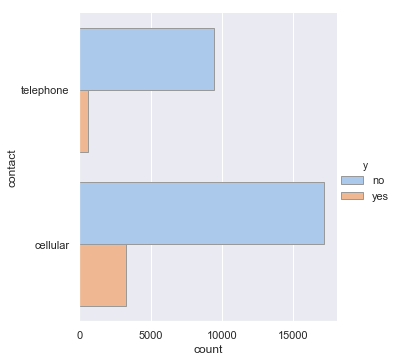

In [295]:
sns.catplot(y="contact", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

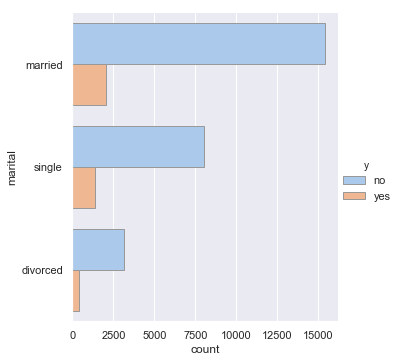

In [296]:
sns.catplot(y="marital", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

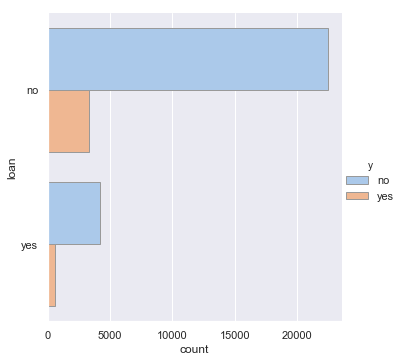

In [297]:
sns.catplot(y="loan", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

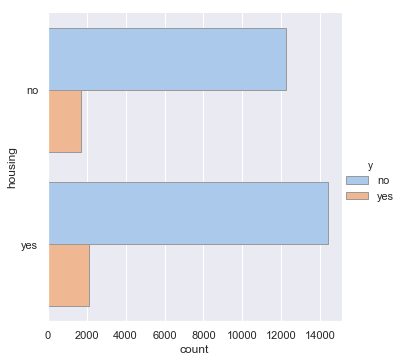

In [298]:
sns.catplot(y="housing", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

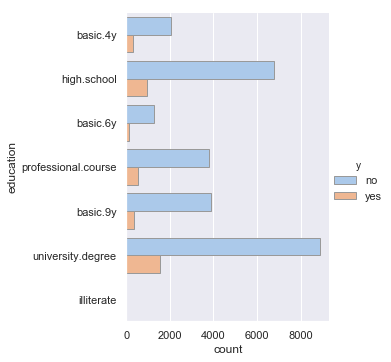

In [299]:
sns.catplot(y="education", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

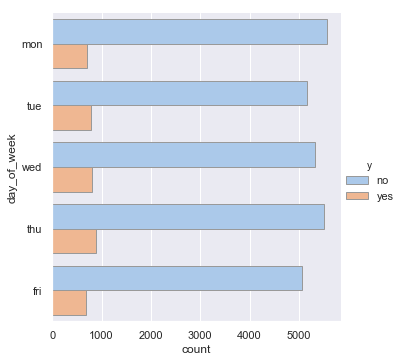

In [300]:
sns.catplot(y="day_of_week", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

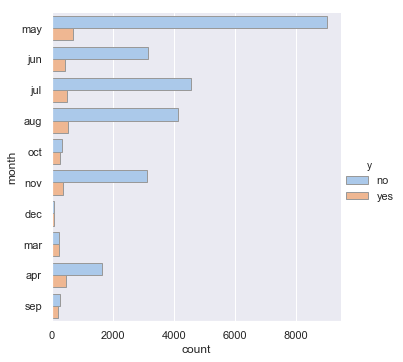

In [301]:
sns.catplot(y="month", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

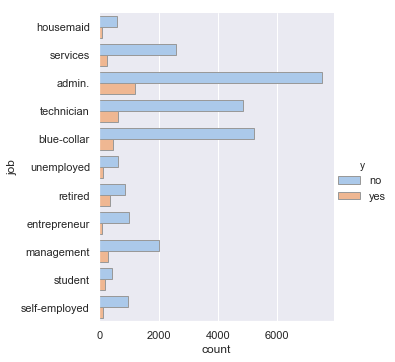

In [302]:
sns.catplot(y="job", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

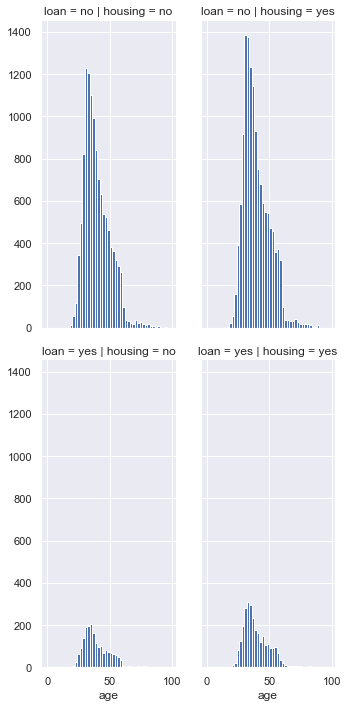

In [303]:
import numpy as np

n_bins = np.arange(0, 100, 2)

g = sns.FacetGrid(df, col="housing", row= "loan",  height=5, aspect=.5)
g = g.map(plt.hist, "age", bins=n_bins, color='b')

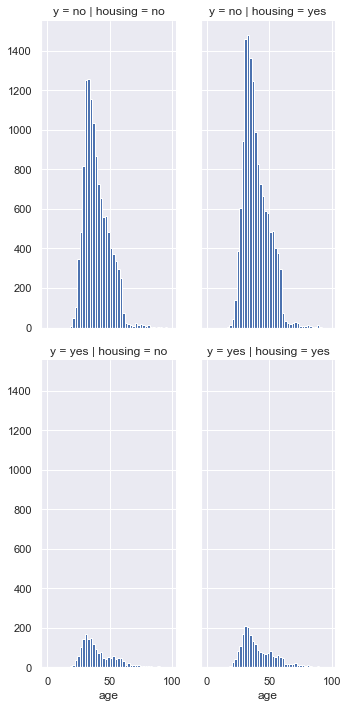

In [304]:
g = sns.FacetGrid(df, col="housing", row= "y",  height=5, aspect=.5)
g = g.map(plt.hist, "age", bins=n_bins, color='b')

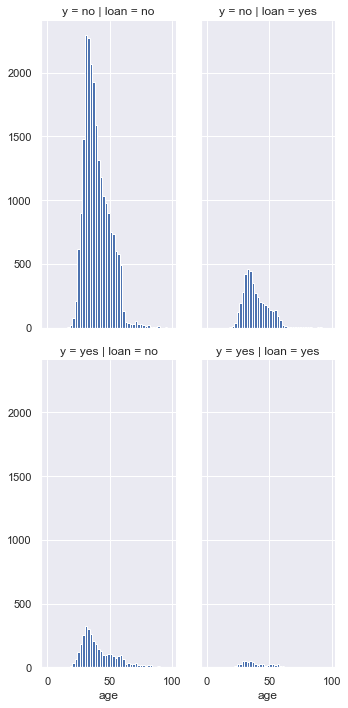

In [305]:
g = sns.FacetGrid(df, col="loan", row= "y",  height=5, aspect=.5)
g = g.map(plt.hist, "age", bins=n_bins, color='b')

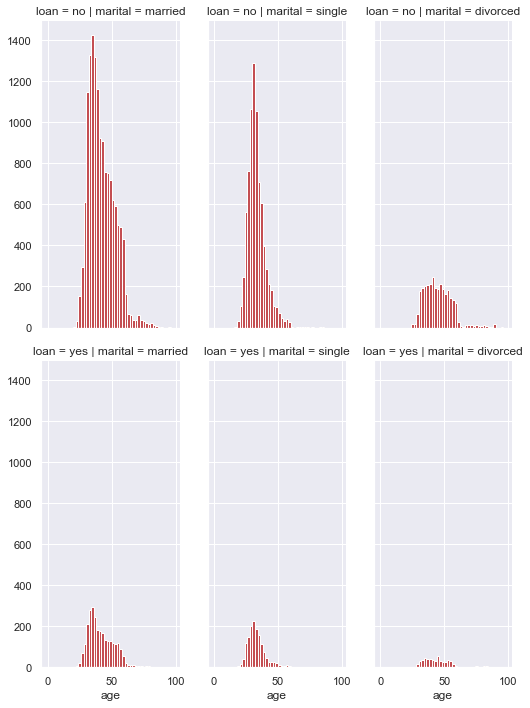

In [306]:
g = sns.FacetGrid(df, col="marital", row= "loan",  height=5, aspect=.5)
g = g.map(plt.hist, "age", bins=n_bins, color='r')

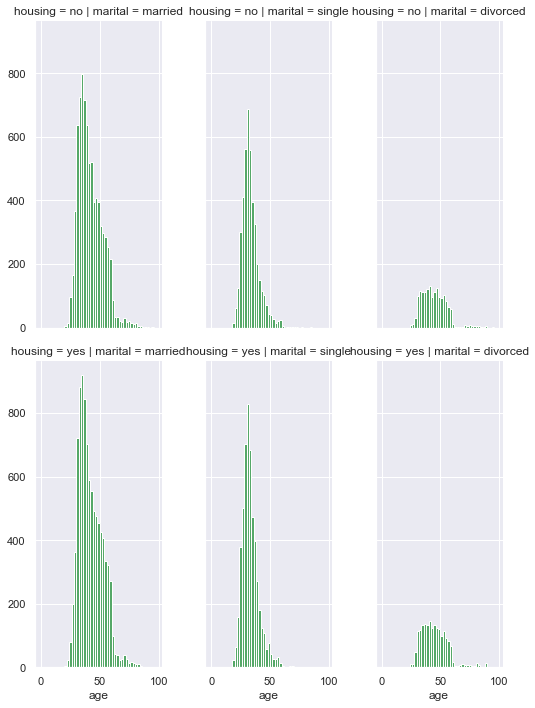

In [307]:
g = sns.FacetGrid(df, col="marital", row= "housing",  height=5, aspect=.5)
g = g.map(plt.hist, "age", bins=n_bins, color='g')

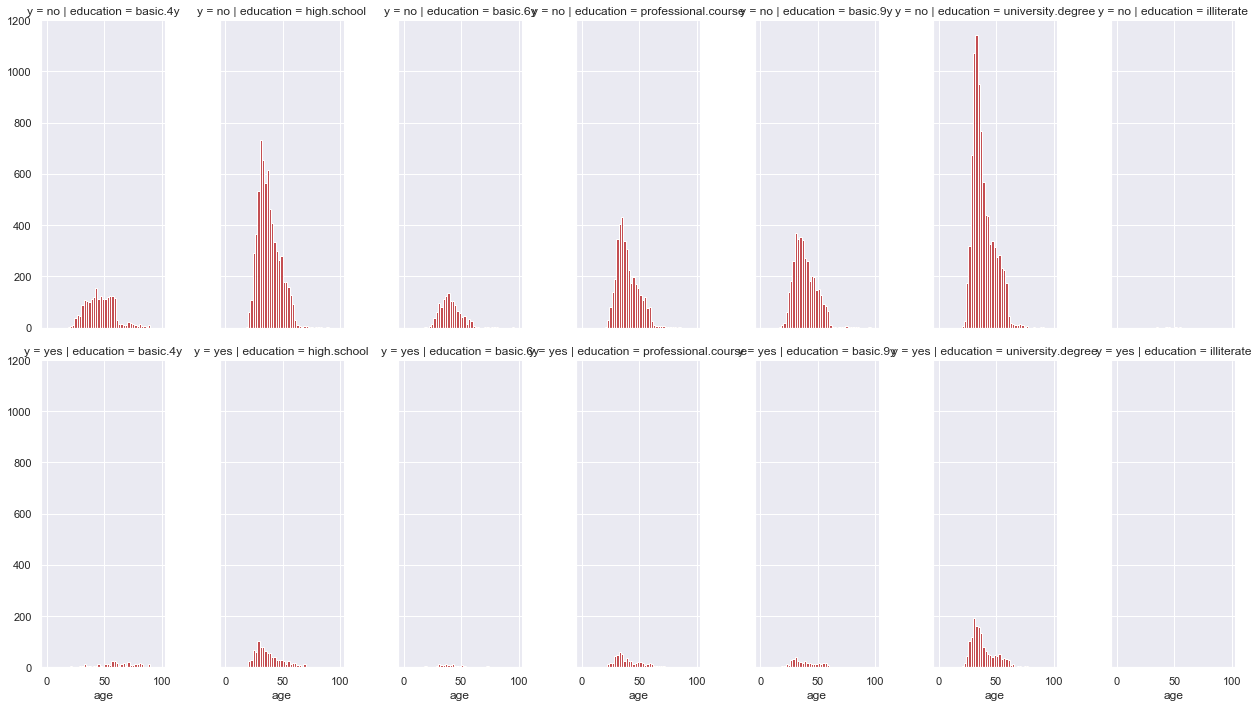

In [308]:
g = sns.FacetGrid(df, col="education", row= "y",  height=5, aspect=.5)
g = g.map(plt.hist, "age", bins=n_bins, color='r')

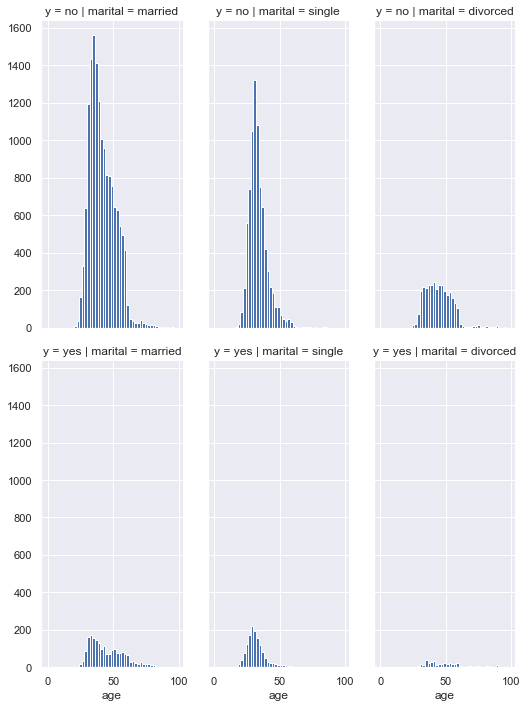

In [309]:
g = sns.FacetGrid(df, col="marital", row= "y",  height=5, aspect=.5)
g = g.map(plt.hist, "age", bins=n_bins, color='b')

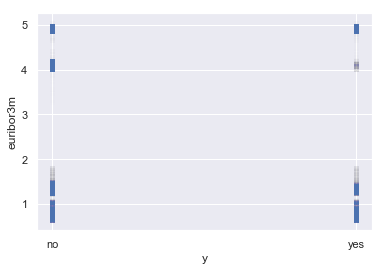

In [310]:
sns.scatterplot(x="y", y="euribor3m", data=df, alpha = .005);

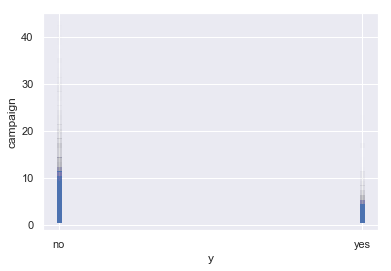

In [311]:
sns.scatterplot(x="y", y="campaign", data=df, alpha = .005);

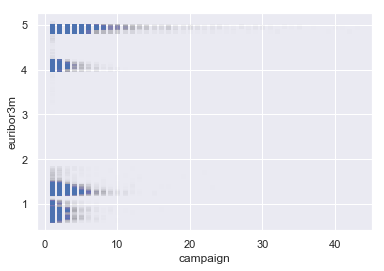

In [312]:
sns.scatterplot(x="campaign", y="euribor3m", data=df, alpha = .005);

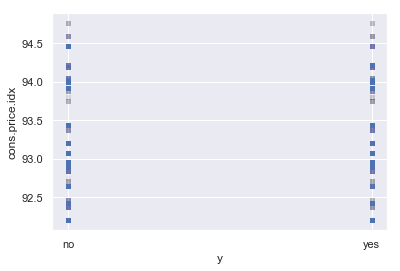

In [313]:
sns.scatterplot(x="y", y="cons.price.idx", data=df, alpha = 0.005);

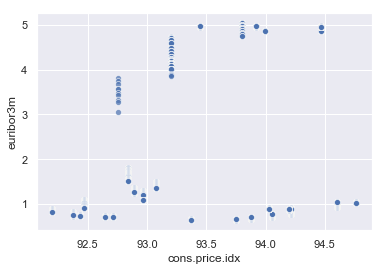

In [314]:
sns.scatterplot(x="cons.price.idx", y="euribor3m", data=df, alpha = 0.7);

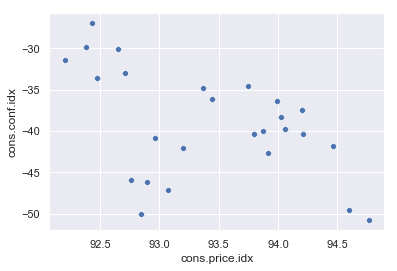

In [315]:
sns.scatterplot(x="cons.price.idx", y="cons.conf.idx", data=df, alpha = 0.7);

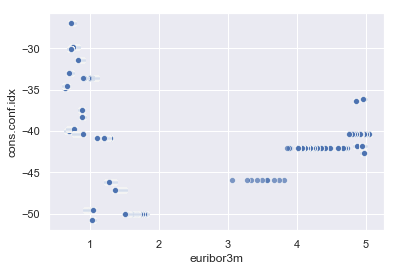

In [316]:
sns.scatterplot(x="euribor3m", y="cons.conf.idx", data=df, alpha = 0.7);

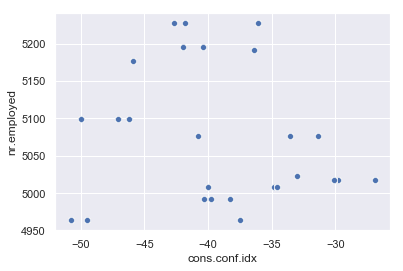

In [317]:
sns.scatterplot(x="cons.conf.idx", y="nr.employed", data=df, alpha = 0.7);

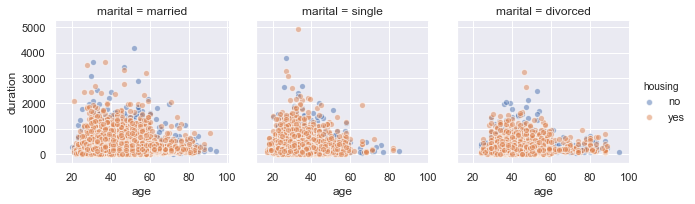

In [318]:
g = sns.FacetGrid(df, col="marital",  hue="housing")
g = (g.map(plt.scatter, "age", "duration", edgecolor="w", alpha = 0.5).add_legend())

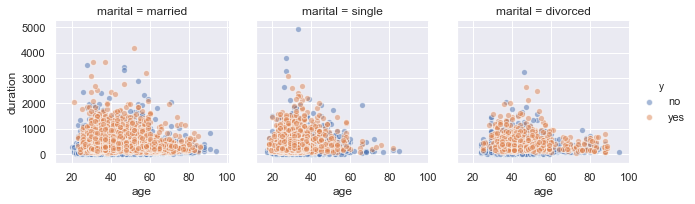

In [319]:
g = sns.FacetGrid(df, col="marital",  hue="y")
g = (g.map(plt.scatter, "age", "duration", edgecolor="w", alpha = 0.5).add_legend())

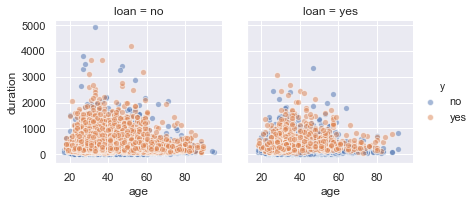

In [320]:
g = sns.FacetGrid(df, col="loan",  hue="y")
g = (g.map(plt.scatter, "age", "duration", edgecolor="w", alpha = 0.5).add_legend())

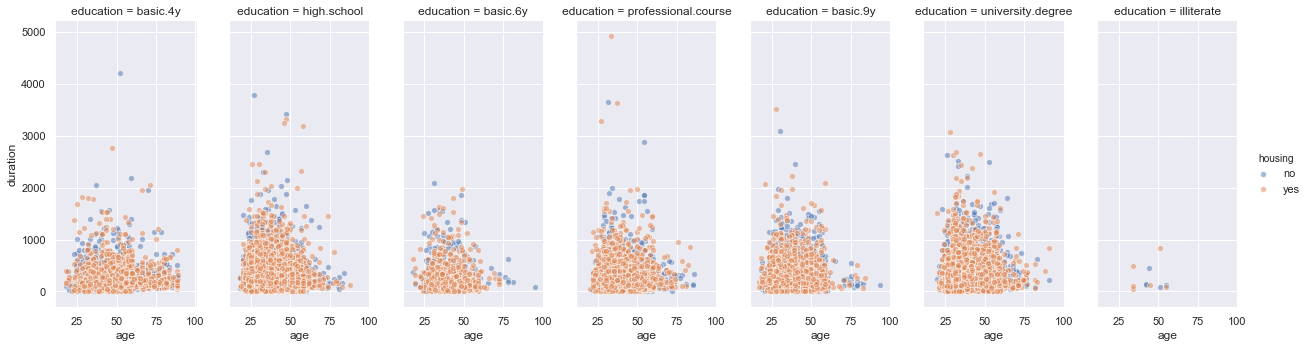

In [321]:
g = sns.FacetGrid(df, col="education",  hue="housing", height=5, aspect=.5)
g = (g.map(plt.scatter, "age", "duration", edgecolor="w", alpha = 0.5).add_legend())

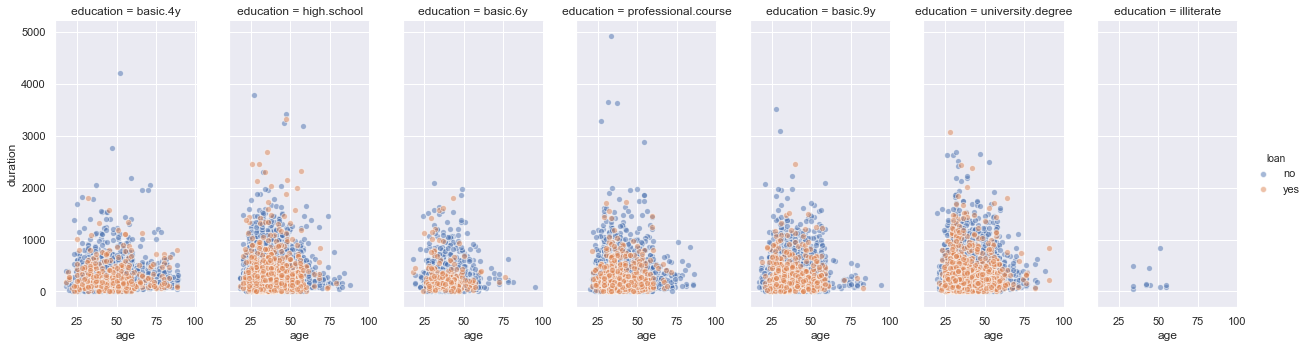

In [322]:
g = sns.FacetGrid(df, col="education",  hue="loan", height=5, aspect=.5)
g = (g.map(plt.scatter, "age", "duration", edgecolor="w", alpha = 0.5).add_legend())

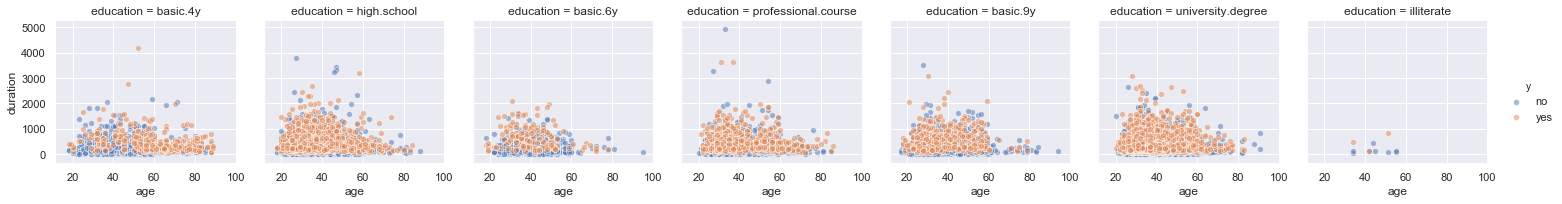

In [323]:
g = sns.FacetGrid(df, col="education",  hue="y")
g = (g.map(plt.scatter, "age", "duration", edgecolor="w", alpha = 0.5).add_legend())

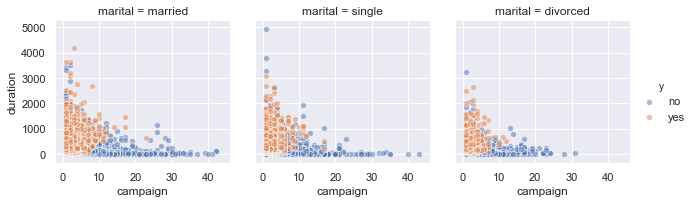

In [324]:
g = sns.FacetGrid(df, col="marital",  hue="y")
g = (g.map(plt.scatter, "campaign", "duration", edgecolor="w", alpha = 0.5).add_legend())

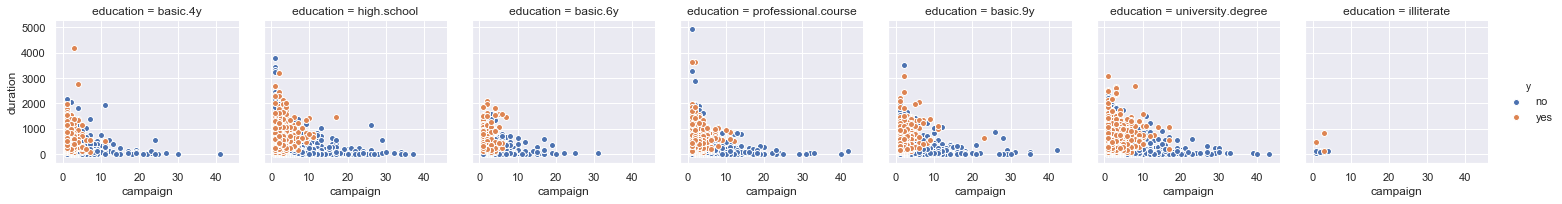

In [325]:
g = sns.FacetGrid(df, col="education",  hue="y")
g = (g.map(plt.scatter, "campaign", "duration", edgecolor="w").add_legend())

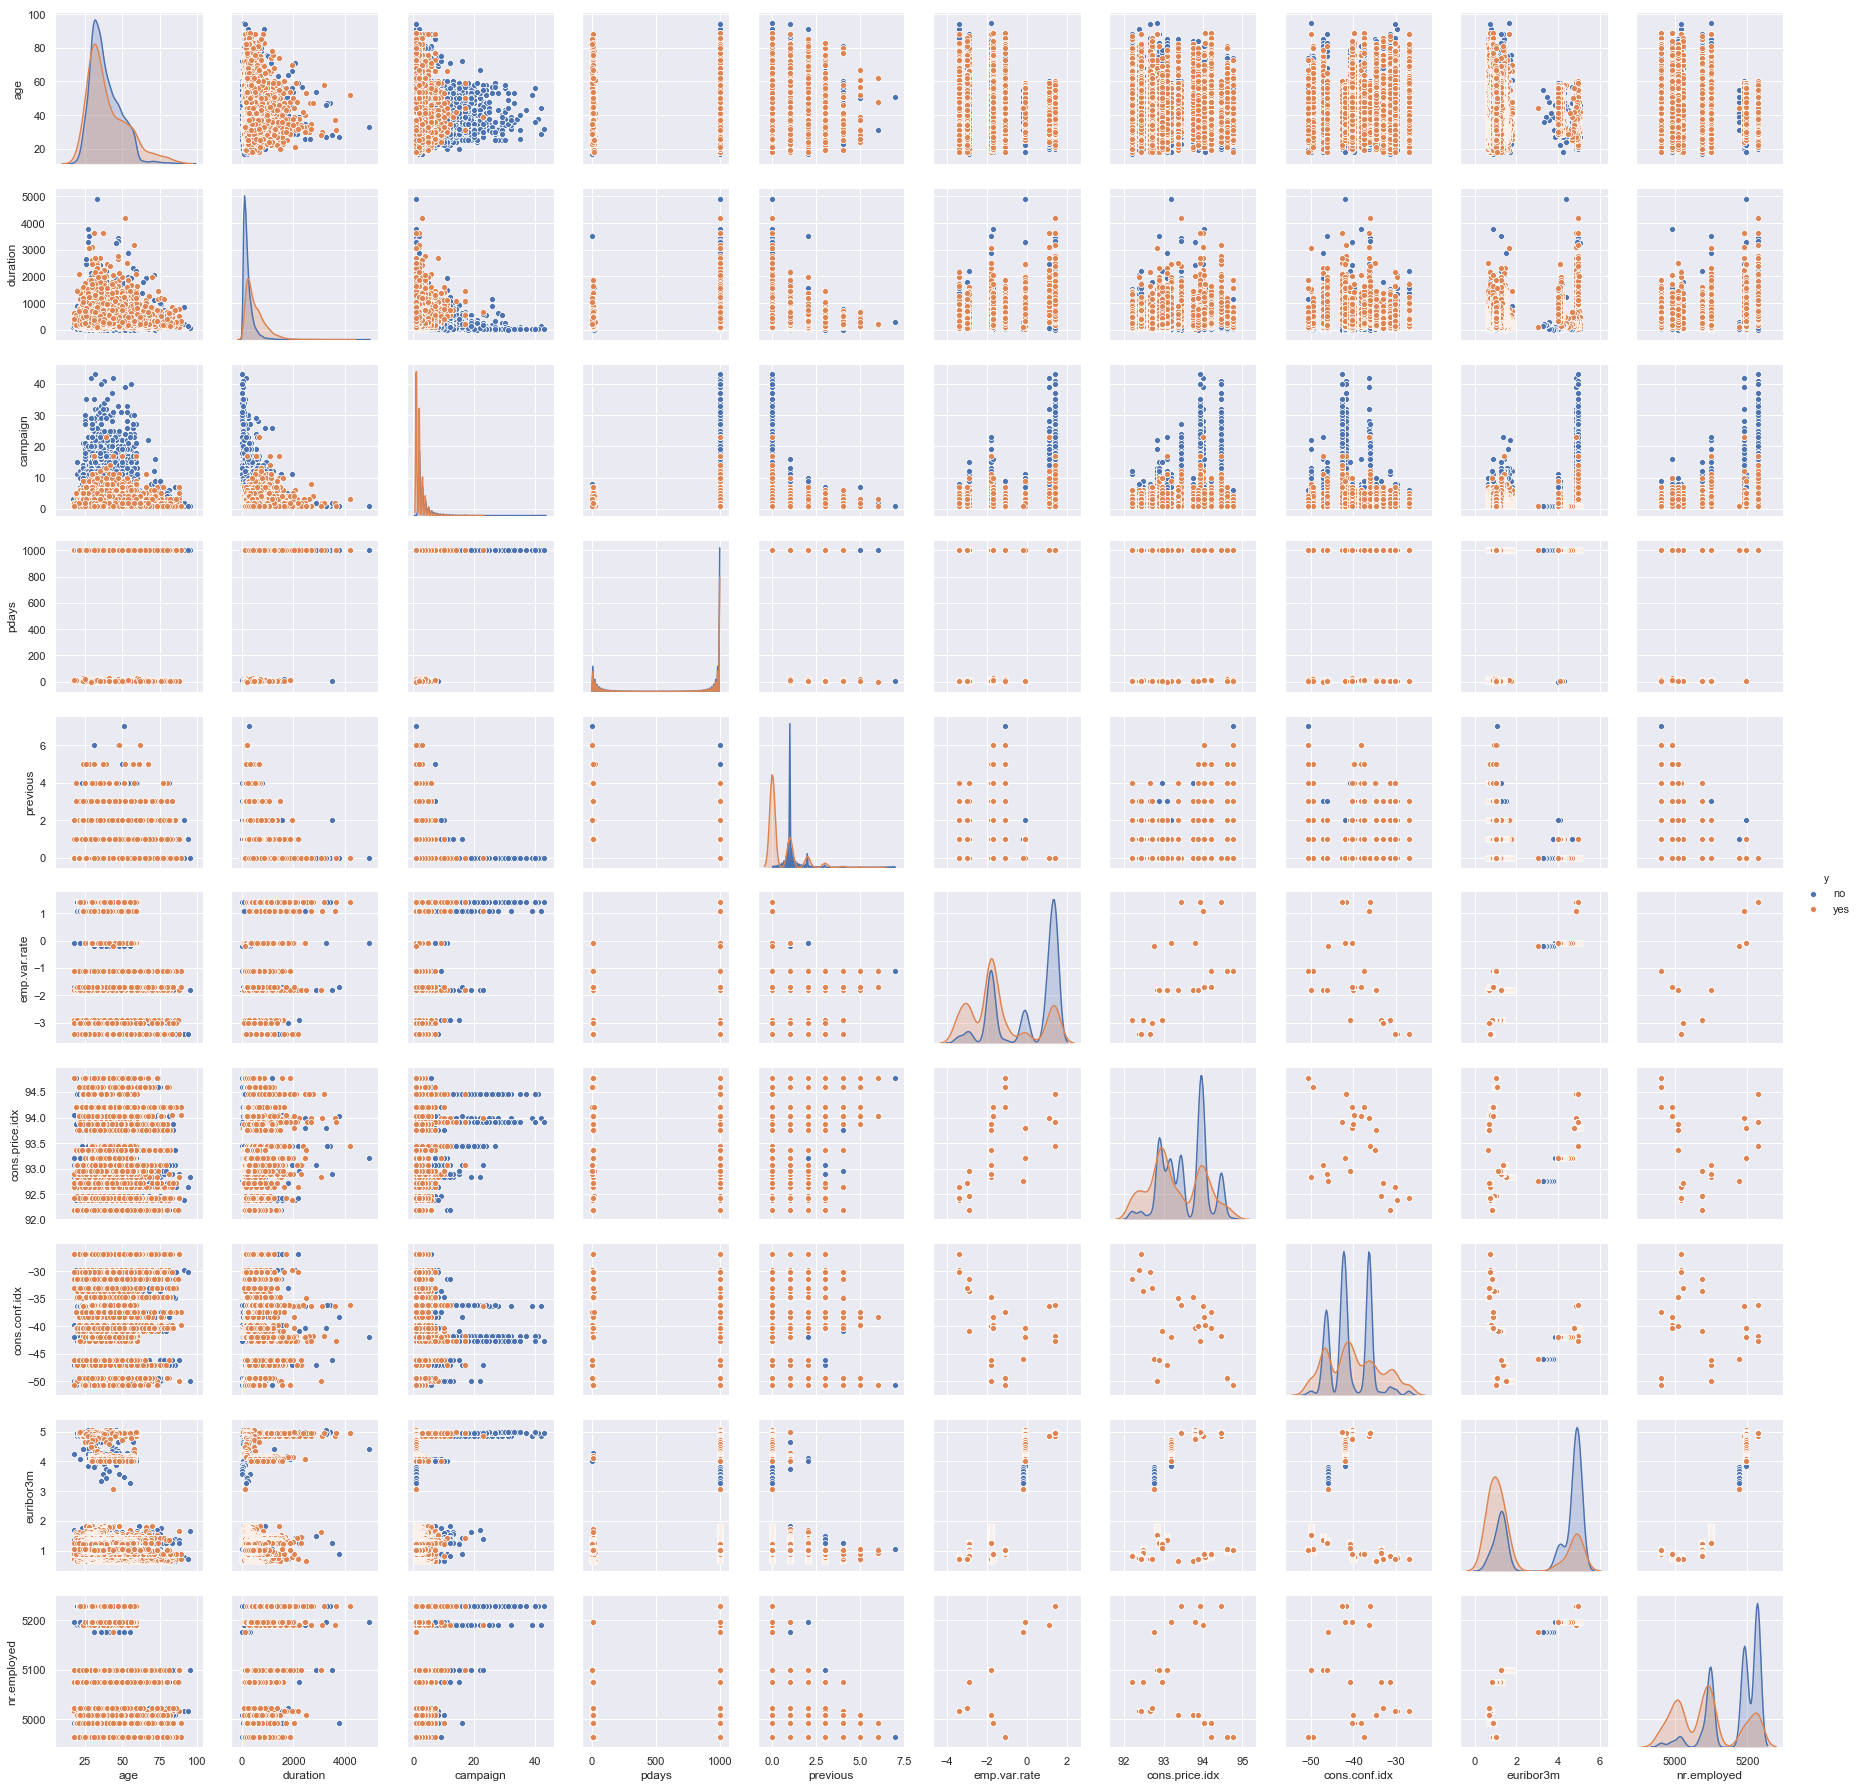

In [326]:
g = sns.pairplot(df, hue="y")

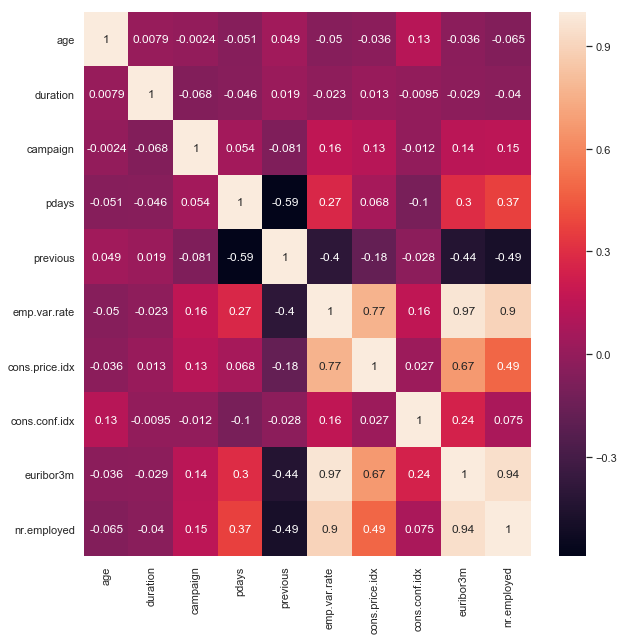

In [327]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(corr, annot=True, ax=ax)

* Most of the clients that subscribed for the term deposit does not have loans
* Most of the clients that subscribed for the term deposit have university degree
* Last call duration seems to be longer for married clients
* Calls made in May shows a low conversion rate (subscriptions/calls).
* Up to 10 contacts in the campaign seems to be more sucessfull for client subscriptions.
* Number of contacts to the same client seems to be higher when the euribor is higher. This due to the fact that term deposit are offered with higher fixed rate when the risk-free interest rate is higher, so it is more probable that client will subscribe for the term deposit.
* Euribor is higher when consumer price index is higher, as we can see in the heatmap. Central bank manipulate short-term interest rates to maintain inflation around a certain target rate. Higher inflation levels leads to high interest rate levels.
* Euribor displays high positive correlation with employment variation rate.

## Feature Selection

In [328]:
## Target label
y = df.y.map(dict(yes=1, no=0))
df.loan = df.loan.map(dict(yes=1, no=0))
df.housing = df.housing.map(dict(yes=1, no=0))
df.default = df.default.map(dict(yes=1, no=0))
df.contact = df.contact.map(dict(cellular=1, telephone=0))

## Subseting training features
df_new = df.loc[:,"age":"nr.employed"]
## Drop undesired columns
df_new = df_new.drop(columns=['pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'nr.employed'])
## One-Hot Encoding
X = pd.get_dummies(df_new, dtype=float)
x_cols = X.columns

Removed 'emp.var.rate', 'cons.price.idx', 'nr.employed' from the features due to the economic aspect those features are strongly correlated with euribor3m. Also poutcome and pdays were removed since they are correlated with previous and most of the poutcome values are labeled as nonexistent

In [329]:
## Feature selection with ANOVA F-value
from sklearn.feature_selection import SelectKBest, f_classif
K_Best = SelectKBest(f_classif)
K_Best.fit(X, y)

selection_scores = {}
for i in range(len(x_cols)):
    selection_scores[x_cols[i]] = K_Best.scores_[i]

k_best_features = sorted(selection_scores.items(), key=lambda x: (-x[1], x[0]))

threshold = 10.
feature_list = []
print("SelectKBest scores:")
for score in k_best_features:
    print(score)
    if score[1] >= threshold:
        feature_list.append(score[0]) ## selecting only features with score above 10.

X = X.drop(columns=['duration'])
del feature_list[0] ##removing duration from the feature list
## selected features
print(feature_list)


SelectKBest scores:
('duration', 5586.3928781605782)
('euribor3m', 3378.7979831964785)
('previous', 1671.7384183749552)
('month_mar', 666.76307496622996)
('contact', 644.25062942995714)
('month_oct', 621.59538809456456)
('month_sep', 479.02158927356442)
('month_may', 391.23382771314948)
('job_retired', 322.90632930416552)
('job_student', 241.30200550373138)
('month_apr', 185.476211929545)
('month_dec', 170.61102112665378)
('campaign', 146.71288654748687)
('job_blue-collar', 139.52127387424932)
('cons.conf.idx', 116.26589635142068)
('age', 72.55591257547961)
('education_university.degree', 66.401032282512446)
('education_basic.9y', 64.092303503479798)
('marital_single', 54.364050294515025)
('job_services', 37.555115181004162)
('month_jul', 36.771991523764861)
('marital_married', 30.32781607581321)
('job_admin.', 17.606245555463541)
('month_nov', 17.563914596321414)
('day_of_week_mon', 14.298991290761432)
('job_unemployed', 13.344229174501237)
('job_entrepreneur', 11.693984248874791)
('e

There are interesting results above. Duration, euribor3m and previous were ranked in top3 score using ANOVA F-test in SelectKBest. As described in the dataset documentation, duration highly affects the target variable. For duration 0 the client not subscribed for the term deposit. For realistic prediction purposes this variable was dropped from the dataset.

## Training and Testing

In [330]:
X = X.loc[:,feature_list]

## Scalling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_new = scaler.transform(X)

## Cross-Validation using 75% of the dataset for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.75, random_state=42)

In [331]:
## Score function
def score(pred, labels_test):
    true_negatives = 0
    true_positives = 0
    false_negatives = 0
    false_positives = 0
    for prediction, truth in zip(pred, labels_test):
        if prediction == 0 and truth == 0:
            true_negatives += 1
        elif prediction == 0 and truth == 1:
            false_negatives += 1
        elif prediction == 1 and truth == 0:
            false_positives += 1
        elif prediction == 1 and truth == 1:
            true_positives += 1
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)

        return accuracy, precision, recall, f1, f2
    except Exception as e: 
        print(e)
        return None

import time

def result(clf, X_train, y_train, X_test, y_test):
    t = time.process_time()
    clf.fit(X_train, y_train)
    training_time = time.process_time() - t
    t = time.process_time()
    pred = clf.predict(X_test)
    testing_time = time.process_time() - t
    accuracy, precision, recall, f1, f2 = score(pred, y_test)
    return training_time, testing_time, accuracy, precision, recall, f1, f2

In [156]:
### Testing algorithms before model tuning

## Training Gaussian NB
classifiers = ['GaussianNB', 'Random Forest', 'AdaBoost', 'SVM', 'Decision Trees']
training_times = []
testing_times = []
accuracies = []
precisions = []
recalls = []
f1s = []
f2s = []

# GaussianNB
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
training_time, testing_time, accuracy, precision, recall, f1, f2, = result(clf, X_train, y_train, X_test, y_test)
training_times.append(training_time)
testing_times.append(testing_time)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)
f2s.append(f2)

## Training using best parameters obtained from gridsearch
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
training_time, testing_time, accuracy, precision, recall, f1, f2, = result(clf, X_train, y_train, X_test, y_test)
training_times.append(training_time)
testing_times.append(testing_time)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)
f2s.append(f2)

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42)
training_time, testing_time, accuracy, precision, recall, f1, f2, = result(clf, X_train, y_train, X_test, y_test)
training_times.append(training_time)
testing_times.append(testing_time)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)
f2s.append(f2)

#SVM
from sklearn.svm import SVC
clf = SVC(C=100, kernel='rbf', gamma = 0.1, random_state=42)
training_time, testing_time, accuracy, precision, recall, f1, f2, = result(clf, X_train, y_train, X_test, y_test)
training_times.append(training_time)
testing_times.append(testing_time)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)
f2s.append(f2)


#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
training_time, testing_time, accuracy, precision, recall, f1, f2, = result(clf, X_train, y_train, X_test, y_test)
training_times.append(training_time)
testing_times.append(testing_time)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)
f2s.append(f2)


#plotting Results
df = pd.DataFrame({'classifier': classifiers,
                    'training_time': training_times,
                    'testing_time': testing_times,
                    'accuracy': accuracies,
                    'precision': precisions,
                    'recall': recalls,
                    'f1_score': f1s,
                    'f2_score': f2s})
df.head()

,classifier,training_time,testing_time,accuracy,precision,recall,f1_score,f2_score
0,GaussianNB,0.015600,0.015600,0.841249,0.385333,0.428769,0.405892,0.419316
1,Random Forest,0.062400,0.015600,0.869938,0.472109,0.239972,0.318203,0.266145
2,AdaBoost,0.218401,0.140401,0.876629,0.539313,0.168396,0.256653,0.195253
3,SVM,3.322821,1.731611,0.875361,0.517101,0.219571,0.308252,0.248124
4,Decision Trees,0.031200,0.000000,0.821482,0.313480,0.345781,0.328839,0.338799


In [93]:
## Applying GridSearch
from sklearn.model_selection import GridSearchCV


## Training Random Forest
clf = RandomForestClassifier(random_state = 42)
rf_params = { 
                'n_estimators': [200, 500],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                'criterion' :['gini', 'entropy']
            }
rf_gs = GridSearchCV(estimator = clf, param_grid = rf_params)
rf_gs.fit(X_train, y_train)
print('Random Forest Classifier best params:' + str(rf_gs.best_params_))

## Training AdaBoost

clf = AdaBoostClassifier(random_state = 42)
ada_params = {
                'n_estimators':[75,200,500],
                'learning_rate':[1.0,1.5,2.0]
             }
ada_gs = GridSearchCV(estimator = clf, param_grid = ada_params)
ada_gs.fit(X_train, y_train)
print('AdaBoost Classifier best params:' + str(ada_gs.best_params_))

## Training SVM
# Applying GridSearch to SVC
clf = SVC(random_state = 42)
svc_params = {'kernel' : ['linear', 'rbf', 'sigmoid'],
              'gamma' : [0.1, 0.01, 0.001, 0.0001],
              'C' : [100, 1000, 10000]
             }
svc_gs = GridSearchCV(estimator = clf, param_grid = svc_params)
svc_gs.fit(X_train, y_train)
print('SVC best params: ' + str(svc_gs.best_params_))


## Benchmark model Decision Tree Classifier
# Applying GridSearch to Decision Tree

clf = DecisionTreeClassifier()
dt_params = {'criterion' : ['gini','entropy'],
             'splitter' : ['best', 'random']
            }
dt_gs = GridSearchCV(estimator = clf, param_grid = dt_params)
dt_gs.fit(X_train, y_train)
print('Decision Tree best params: ' + str(dt_gs.best_params_))

Random Forest Classifier best params:{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
AdaBoost Classifier best params:{'learning_rate': 1.0, 'n_estimators': 75}
SVC best params: {'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'}
Decision Tree best params: {'criterion': 'entropy', 'splitter': 'random'}


### Grid search best parameters:

>**Random Forest**: 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500 <br>
>**AdaBoost Classifier**: 'learning_rate': 1.0, 'n_estimators': 75 <br>
>**SVM**: 'C': 100, 'gamma': 0.1, 'kernel': 'rbf' <br>
>**Decision Tree**: {'criterion': 'entropy', 'splitter': 'random'}

In [397]:
classifiers = ['GaussianNB', 'Random Forest', 'AdaBoost', 'SVM', 'Decision Trees']
training_times = []
testing_times = []
accuracies = []
precisions = []
recalls = []
f1s = []
f2s = []

# GaussianNB
clf = GaussianNB()
training_time, testing_time, accuracy, precision, recall, f1, f2, = result(clf, X_train, y_train, X_test, y_test)
training_times.append(training_time)
testing_times.append(testing_time)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)
f2s.append(f2)

## Training using best parameters obtained from gridsearch
#Random Forest
clf = RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=500, random_state=42)
training_time, testing_time, accuracy, precision, recall, f1, f2, = result(clf, X_train, y_train, X_test, y_test)
training_times.append(training_time)
testing_times.append(testing_time)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)
f2s.append(f2)

#AdaBoost
clf = AdaBoostClassifier(learning_rate=1.0, n_estimators=75, random_state=42)
training_time, testing_time, accuracy, precision, recall, f1, f2, = result(clf, X_train, y_train, X_test, y_test)
training_times.append(training_time)
testing_times.append(testing_time)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)
f2s.append(f2)

#SVM
clf = SVC(C=10000, gamma=0.01, kernel='rbf', random_state=42)
training_time, testing_time, accuracy, precision, recall, f1, f2, = result(clf, X_train, y_train, X_test, y_test)
training_times.append(training_time)
testing_times.append(testing_time)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)
f2s.append(f2)


#Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', splitter='random')
training_time, testing_time, accuracy, precision, recall, f1, f2, = result(clf, X_train, y_train, X_test, y_test)
training_times.append(training_time)
testing_times.append(testing_time)
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)
f2s.append(f2)


#plotting Results
df = pd.DataFrame({'classifier': classifiers,
                    'training_time': training_times,
                    'testing_time': testing_times,
                    'accuracy': accuracies,
                    'precision': precisions,
                    'recall': recalls,
                    'f1_score': f1s,
                    'f2_score': f2s})
df.head()

,classifier,training_time,testing_time,accuracy,precision,recall,f1_score,f2_score
0,GaussianNB,0.015600,0.000000,0.840453,0.359909,0.427027,0.390606,0.411673
1,Random Forest,1.622410,0.140401,0.892233,0.669725,0.197297,0.304802,0.229704
2,AdaBoost,0.312002,0.031200,0.883495,0.536232,0.200000,0.291339,0.228677
3,SVM,26.052167,0.218401,0.888350,0.581699,0.240541,0.340344,0.272505
4,Decision Trees,0.015600,0.000000,0.851456,0.389578,0.424324,0.406210,0.416888


## Results

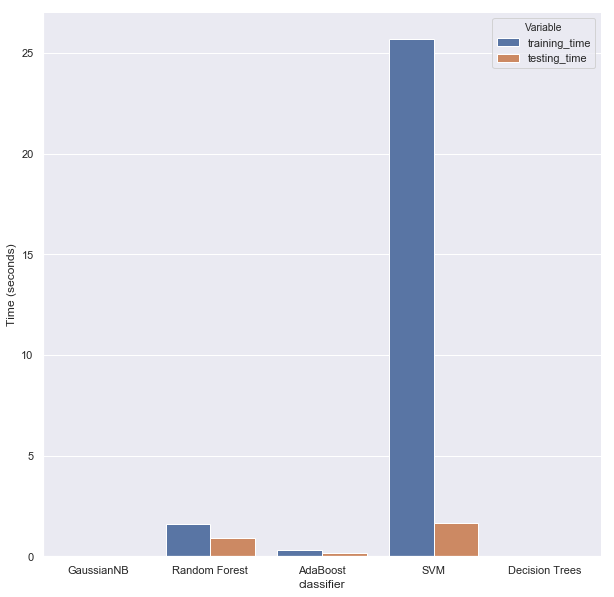

In [158]:
## Training and Testing time
df_t = df.loc[:,['classifier', 'training_time', 'testing_time']]

fig, ax = plt.subplots(figsize=(10, 10))
tidy = (
    df_t.set_index('classifier')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Time (seconds)'})
)
sns.barplot(x='classifier', y='Time (seconds)', hue='Variable', data=tidy, ax=ax)
sns.despine(fig)

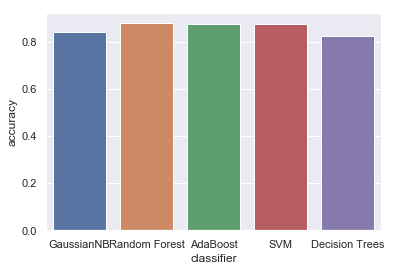

In [159]:
## Accuracy
sns.barplot(x="classifier", y="accuracy", data=df)

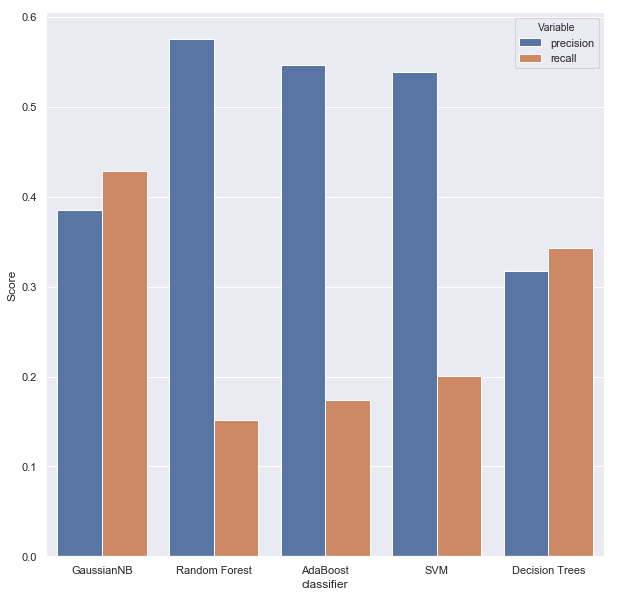

In [161]:
## Precision and Recall
df_p = df.loc[:,['classifier', 'precision', 'recall']]

fig, ax = plt.subplots(figsize=(10, 10))
tidy = (
    df_p.set_index('classifier')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Score'})
)
sns.barplot(x='classifier', y='Score', hue='Variable', data=tidy, ax=ax)
sns.despine(fig)

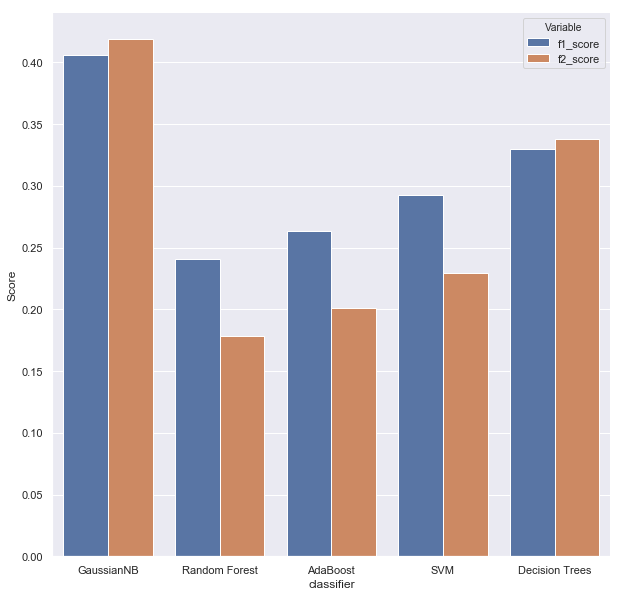

In [160]:
## Precision and Recall
df_f = df.loc[:,['classifier', 'f1_score', 'f2_score']]

fig, ax = plt.subplots(figsize=(10, 10))
tidy = (
    df_f.set_index('classifier')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Score'})
)
sns.barplot(x='classifier', y='Score', hue='Variable', data=tidy, ax=ax)
sns.despine(fig)

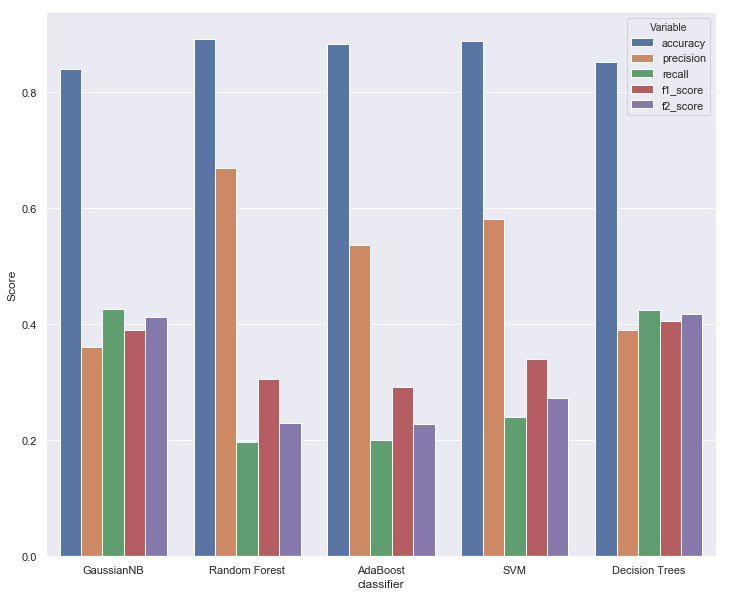

In [403]:
df_final = df.loc[:,['classifier', 'accuracy', 'precision', 'recall', 'f1_score', 'f2_score']]
fig, ax = plt.subplots(figsize=(12, 10))
tidy = (
    df_final.set_index('classifier')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Score'})
)
sns.barplot(x='classifier', y='Score', hue='Variable', data=tidy, ax=ax)
sns.despine(fig)

In [396]:
## Final model

# Loading data set
df = pd.read_csv("bank-additional/bank-additional.csv", sep = ";")
df.head()

# Cleaning
df = df[df.marital != 'unknown']
df = df[df.default != 'unknown']
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.job != 'unknown']
df = df[df.education != 'unknown']

# Target label
y_test = df.y.map(dict(yes=1, no=0))
# Mapping values
df.loan = df.loan.map(dict(yes=1, no=0))
df.housing = df.housing.map(dict(yes=1, no=0))
df.default = df.default.map(dict(yes=1, no=0))
df.contact = df.contact.map(dict(cellular=1, telephone=0))

# Subseting training features
df_new = df.loc[:,"age":"nr.employed"]
# Drop undesired columns
df_new = df_new.drop(columns=['pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'nr.employed'])
# One-Hot Encoding
X = pd.get_dummies(df_new, dtype=float)
x_cols = X.columns

X = X.loc[:,feature_list]

# Scalling
scaler = MinMaxScaler()
scaler.fit(X)
X_test = scaler.transform(X)

# Final Model testing
clf = GaussianNB()
training_time, testing_time, accuracy, precision, recall, f1, f2, = result(clf, X_train, y_train, X_test, y_test)
print("Gaussian NB")
print("Metric, Score")
print("Accuracy, " + str(accuracy))
print("Recall, " + str(recall))
print("F1-Score, " + str(f1))

# Benchmark Model
n = 100
accuracy = 0.0
recall = 0.0
f1 = 0.0
for i in range(n):
    clf = DecisionTreeClassifier(criterion='entropy', splitter='random')
    training_time, testing_time, acc, precision, rec, f1_, f2, = result(clf, X_train, y_train, X_test, y_test)
    accuracy += acc
    recall += rec
    f1 += f1_

print("\nDecision Trees")
print("Metric, Score")
print("Mean Accuracy, " + str(accuracy/n))
print("Mean Recall, " + str(recall/n))
print("Mean F1-Score, " + str(f1/n))


Gaussian NB
Metric, Score
Accuracy, 0.8404530744336569
Recall, 0.42702702702702705
F1-Score, 0.39060568603213847

Decision Trees
Metric, Score
Mean Accuracy, 0.8570841423948218
Mean Recall, 0.4409189189189189
Mean F1-Score, 0.4248625776654371


## Conclusion

The Gaussian Naive-Bayes performed better than other classifiers (included bechmark model) in time and recall in the training phase.
At the final testing phase, the benchmark model performed better. 

The nature of the problem demands more robust score methods than accuracy. False negative means that we are leaving money on the table. In this case recall is a more important metric to stick on. Gaussian Naive-Bayes will be chosen as the final model since it outperformed all other models in recall and f1-score.

I feel that the dataset used in this project lack of some features that could improve scores, such as number of children, income, gender. Another issue observed, is that the data is imbalanced. Approximately only 12% subscribed for the term deposit and most of contacts were made in may, given that, its more apropriate to not consider sazonality in the prediction model. Top 5 non-multilevel features obtained through feature selection with SelectKBest are: **euribor3m**, **previous**, **contact**, **campaign**, **cons.conf.idx**. Based on those features, we could suggest a better marketing strategy, for example:

**euribor3m**: With low risk free interest rate, term deposits are offered with a lower interest rate. The bank could offer another type of products that are more attractive in this economic scenario.<br>

**previous**: This is a important feature when looking in the long run. Making more frequent calls to keep the relationship with the client closer will make a huge impact in future possible subscriptions.<br>

**contact**: The dataset showed that contacts through cellular are more efficient than telephone. <br>

**campaign**: This is the same case as **previous** feature. Create a better relationship with the client. <br>

**cons.conf.idx**: When the consumer confidence index is lower, clients will tend to spend less and save more. Usually they will prefer investments with less risk.